<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/AUC_ROC_M%C3%A9trica_de_Avalia%C3%A7%C3%A3o_das_M%C3%A1quinas_Preditivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Grey'> AUC_ROC - Métrica de Avaliação das Máquinas Preditivas </font>

####**Obs**: Aprendizagem Supervisionada Binária e Multi classes


![alt text](https://miro.medium.com/max/1028/1*tMIpJr1H84Pdb1-UxtCbCw.gif)

![alt text](https://miro.medium.com/max/2400/1*Dz0AhFrL2U-Y3FJA8RUpKg.gif)




#Entendendo os Componentes da Curva ROC

## ![alt text](https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png)

##TPR (taxa de verdadeiro positivo)/  Sentitividade ou   Recall

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/sensitivity.gif)

##FPR (taxa de falso positivo)

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/FPR.gif)

### Especificidade

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/Specificity.gif)

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Basic-Confusion-matrix.png)

### FNR - Taxa de Falso Negativo

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/FNR.gif)

# AUC - Area Under the Curve (ROC)

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC1.png)

### 1 - Problema de Negócio: Calcular a AUC_ROC

### 2 - Análise/Fonte de Dados

In [1]:
# auc roc curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [5]:
make_classification

<function sklearn.datasets._samples_generator.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)>

### 3 - Pré-Processamento

In [6]:
# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [8]:
X

array([[-0.25820289,  1.0198078 ,  1.52456317, ...,  0.33272104,
        -0.17540696,  1.50112422],
       [-0.45816647,  0.82872793, -0.65696499, ...,  1.2019375 ,
        -0.25583476, -0.19931278],
       [-0.3873777 ,  0.76181785, -1.31035138, ..., -1.0332091 ,
        -1.68667137, -0.76683607],
       ...,
       [-0.54779315, -0.67453913, -0.83464431, ...,  0.57821623,
        -1.17254773,  1.08301901],
       [ 0.5596188 , -0.62502523,  1.40453753, ..., -1.66951495,
        -0.29276041,  0.48456871],
       [-1.42487559,  0.52714552,  0.15786417, ...,  3.25163637,
        -0.54779104, -1.51033252]])

In [9]:
y

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,

### 4 - Criação da Máquina Preditiva

In [13]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=5)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [15]:
pred_prob2

array([[0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2,

### 5 - Avaliação da Máquina

In [16]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


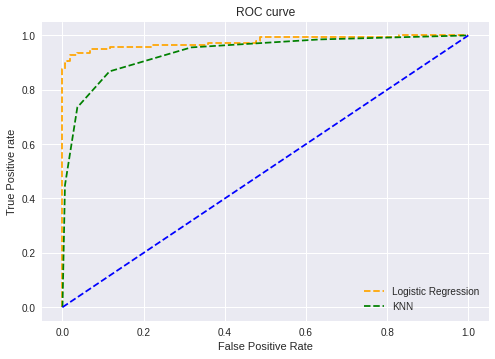

In [19]:
# multi-class classification
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [20]:
from sklearn.metrics import roc_auc_score
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9373206599713056



![alt text](https://www.spectrumnews.org/wp-content/uploads/2016/08/fig-3-1.gif)
